In [14]:
## import the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import datetime
import missingno as msno         
## some notes -should have dropped the ID colummn first 

In [15]:
# impor the data 

train=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')

In [16]:
# change the column names to lower case 
train.columns=map(str.lower,train.columns)
# data.columns = [x.lower() for x in data.columns] #would also suffice 
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Explore the missing values

In [17]:
# what is the number of missing values present 
# train.shape
# train.columns[train.isnull().sum()>0] # columns with missing value present 
# we could decide to do away with some which have a certain percent of missing values 
# let us get this percentages 
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().sum().sort_values(ascending=False)/train.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
masvnrtype,872,59.726027
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945


## Explore all the categorical variables 

In [19]:
## get their names first 
categorical = train.select_dtypes(include=[object])
categorical.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
## plot the missingness in the categorical variabele
missing_vars=[x for x in missing_df.index if x in categorical.columns]

In [21]:
missing_df_resetted=missing_df.reset_index()
missing_df_cat=missing_df_resetted[missing_df_resetted['variable'].isin(categorical.columns)]

<Figure size 2000x2000 with 0 Axes>

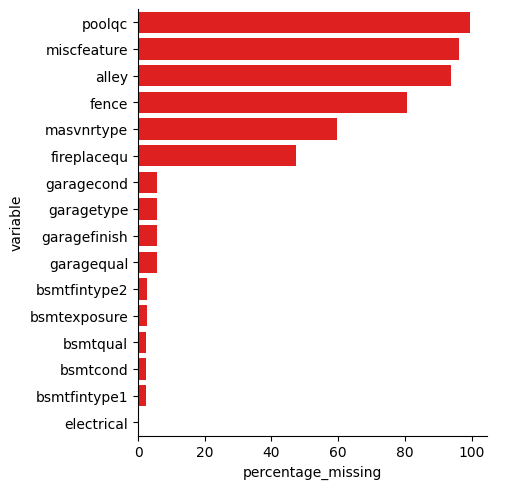

In [22]:
## plot now 
plt.figure(figsize=(20,20))
ax=sns.catplot(y='variable',x='percentage_missing',data=missing_df_cat,kind='bar',color='red')


### exploring numerical variables 

In [23]:
numerical=train.select_dtypes(include=[np.number])
numerical.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [24]:
numerical.head(4)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000


In [25]:
#missing values in numerical variables 
missing_df_resetted[missing_df_resetted['variable'].isin(numerical.columns)]

,variable,total_missing,percentage_missing
6,lotfrontage,259,17.739726
7,garageyrblt,81,5.547945
17,masvnrarea,8,0.547945


## handling missing values 
If a variable is object type we want to impute with 'None'while 
for numerica type we want to impute with mean

In [26]:
categorical.fillna('None').head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


#### handling both categorical and numeric separately

In [27]:
# for var in numerical.columns:
#     numerical.fillna(numerical[var].mode()[0])
# numerical.isnull().sum()
for var in ['lotfrontage','garageyrblt','masvnrarea']:
    train[var]=train[var].fillna(train[var].mode()[0])

In [28]:
for var in ['alley','miscfeature','poolqc','fence','fireplacequ','garagecond','garagequal',
            'garagefinish','garagetype','bsmtfintype2','bsmtfintype1','bsmtqual','bsmtcond','bsmtexposure','masvnrtype','electrical']:
    train[var]=train[var].fillna('None')

In [281]:
train.isnull().sum().sort_values(ascending=False)

saleprice       0
heating         0
roofstyle       0
roofmatl        0
exterior1st     0
exterior2nd     0
masvnrtype      0
masvnrarea      0
exterqual       0
extercond       0
foundation      0
bsmtqual        0
bsmtcond        0
bsmtexposure    0
bsmtfintype1    0
bsmtfinsf1      0
bsmtfintype2    0
bsmtfinsf2      0
bsmtunfsf       0
yearremodadd    0
yearbuilt       0
overallcond     0
landcontour     0
mssubclass      0
mszoning        0
lotfrontage     0
lotarea         0
street          0
alley           0
lotshape        0
               ..
screenporch     0
poolarea        0
poolqc          0
fence           0
miscfeature     0
miscval         0
mosold          0
yrsold          0
saletype        0
garagecars      0
garagefinish    0
garageyrblt     0
fullbath        0
electrical      0
1stflrsf        0
2ndflrsf        0
lowqualfinsf    0
grlivarea       0
bsmtfullbath    0
bsmthalfbath    0
halfbath        0
garagetype      0
bedroomabvgr    0
kitchenabvgr    0
kitchenqua

In [ ]:
# LotFrontage is correlated to the 'Neighborhood' feature because the LotFrontage for nearby houses will be really similar, so we fill in missing values by the median based off of Neighborhood
# dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

## continous numerical variables 

In [29]:
temporal_vars=[x for x in train.columns if 'yr' in x or  'year' in x]
temporal_vars

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

In [30]:
numerical.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [31]:
discrete=[x for x in numerical.columns if len(train[x].unique())<25] # get all the discrete variables in the dataset
continous_numerical=[x for x in numerical.columns if x not in temporal_vars+["id"] and x not in discrete]
print("there are {} continous variables in this dataset".format(len(continous_numerical)))

there are 16 continous variables in this dataset


In [32]:
train[continous_numerical].head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


## explore the relationship of these continous variables with selling price 

In [33]:
train[continous_numerical].corr()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
lotfrontage,1.000000,0.281283,0.174146,0.199171,0.034498,0.138852,0.359606,0.404099,0.070626,0.359866,0.317925,0.061329,0.131468,0.014349,0.036907,0.329220
lotarea,0.281283,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
masvnrarea,0.174146,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.370884,0.159991,0.122528,-0.109907,0.062248,0.472614
bsmtfinsf1,0.199171,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
bsmtfinsf2,0.034498,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
bsmtunfsf,0.138852,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
totalbsmtsf,0.359606,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stflrsf,0.404099,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852
2ndflrsf,0.070626,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.208026,0.061989,0.040606,0.319334
grlivarea,0.359866,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624


In [34]:
corr_df=train[continous_numerical].corr()
corr_df.nlargest(5,'saleprice')

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
saleprice,0.329220,0.263843,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,0.708624,0.623431,0.324413,0.315856,-0.128578,0.111447,1.000000
grlivarea,0.359866,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624
garagearea,0.317925,0.180403,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,0.468997,1.000000,0.224666,0.241435,-0.121777,0.051412,0.623431
totalbsmtsf,0.359606,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stflrsf,0.404099,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [170]:
corr_df['saleprice'].sort_values(ascending=False)

saleprice        1.000000
grlivarea        0.708624
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
masvnrarea       0.477493
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
lotarea          0.263843
bsmtunfsf        0.214479
screenporch      0.111447
bsmtfinsf2      -0.011378
enclosedporch   -0.128578
Name: saleprice, dtype: float64

<Axes: >

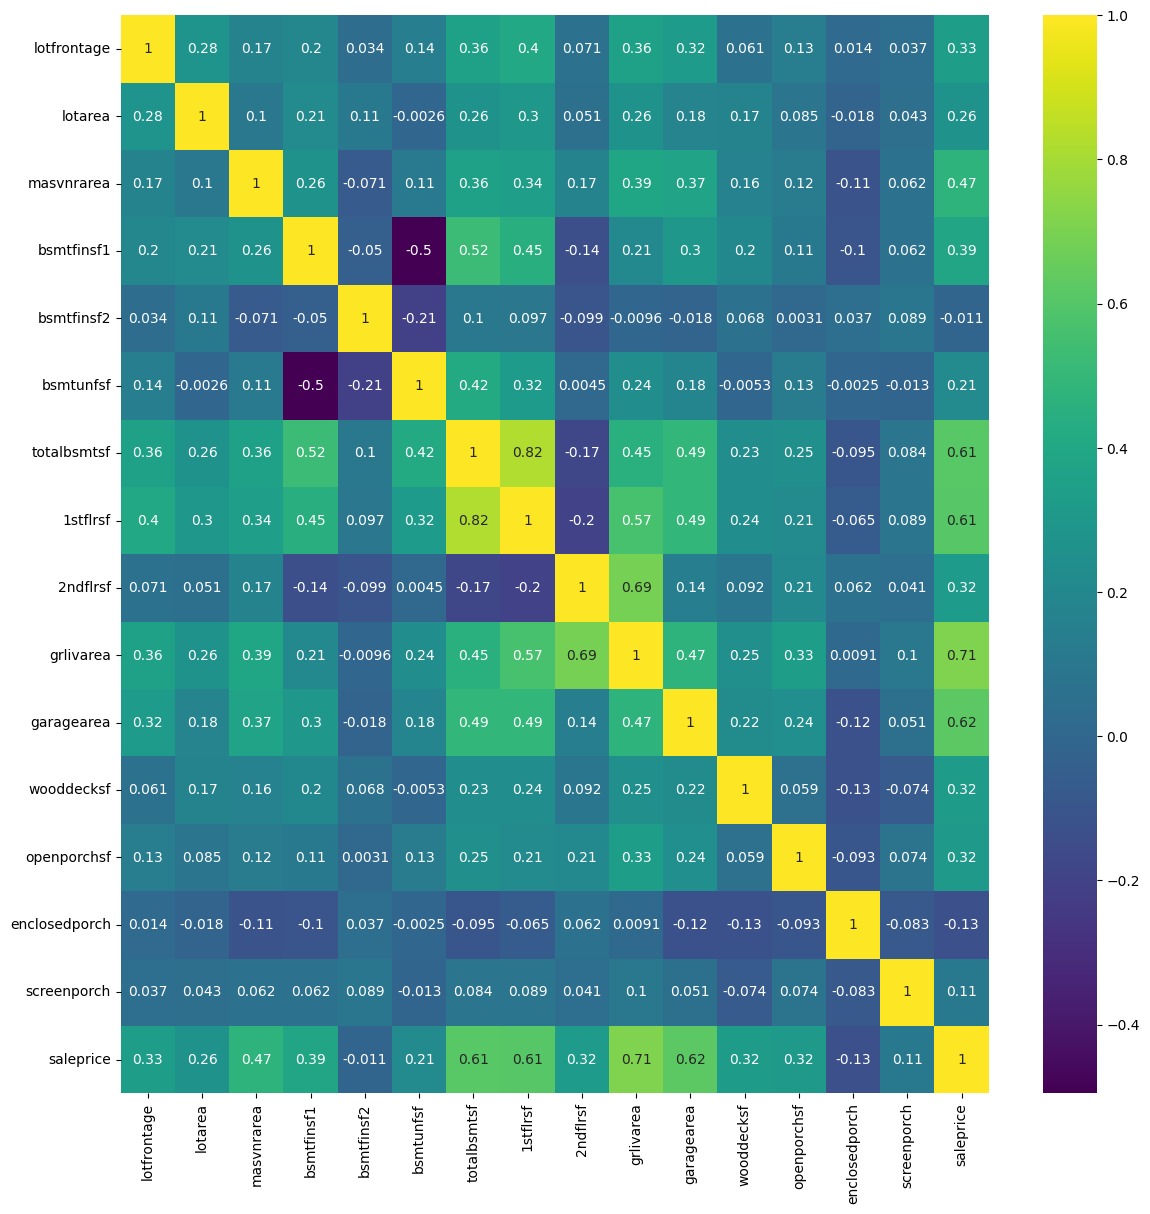

In [35]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr_df,annot=True,cmap='viridis')

In [36]:
# those with high correlation with saleprice 
cols=corr_df.nlargest(10,'saleprice')['saleprice'].index
cols

Index(['saleprice', 'grlivarea', 'garagearea', 'totalbsmtsf', '1stflrsf',
       'masvnrarea', 'bsmtfinsf1', 'lotfrontage', 'wooddecksf', '2ndflrsf'],
      dtype='object')

<Axes: >

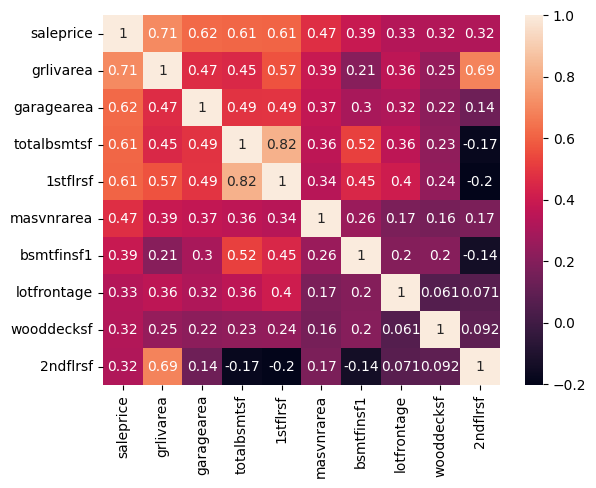

In [37]:
corrmap=np.corrcoef(train[cols].values.T)
sns.heatmap(corrmap,annot=True,xticklabels=cols.values,yticklabels=cols.values)

## explore the relationship between the discrete variables and selling price

In [38]:
train['mssubclass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [39]:
train[discrete].head()

,mssubclass,overallqual,overallcond,lowqualfinsf,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,3ssnporch,poolarea,miscval,mosold,yrsold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


In [40]:

def plot():
    for var in discrete:
        
        if not var=='mssubclass'or not var=='3ssnporch':
            train.groupby(var)['saleprice'].mean().plot.bar(color='tan')
            plt.ylabel('selling price of house')
            plt.title(var)
            plt.grid(True)
            plt.show()

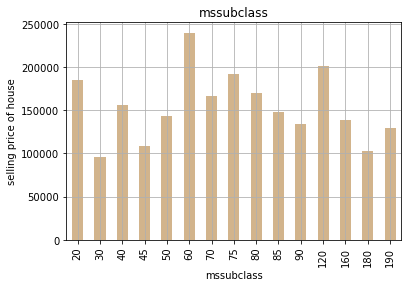

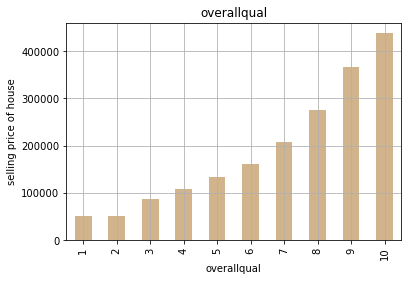

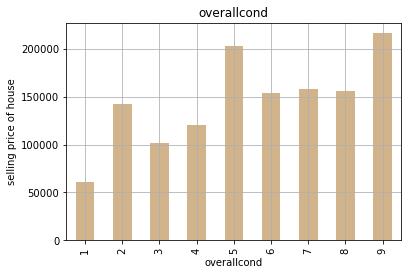

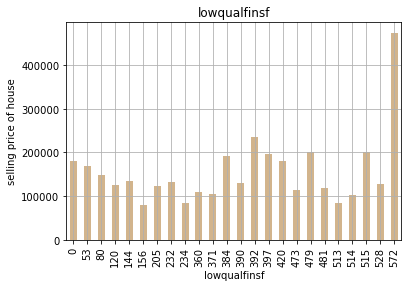

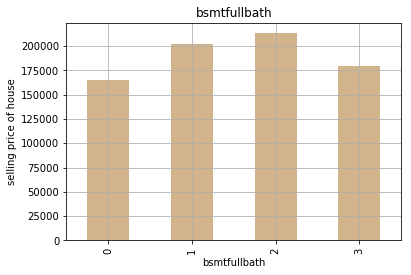

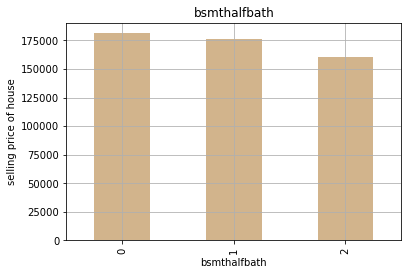

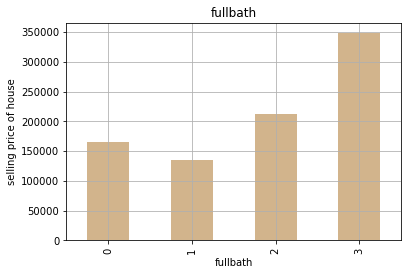

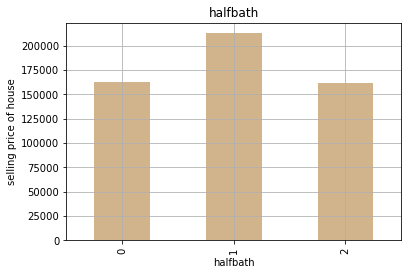

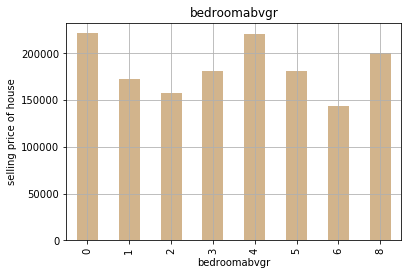

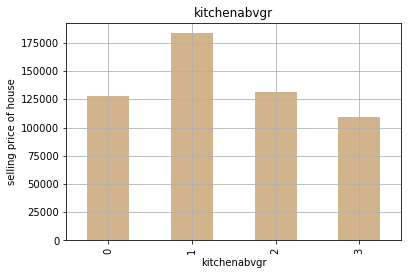

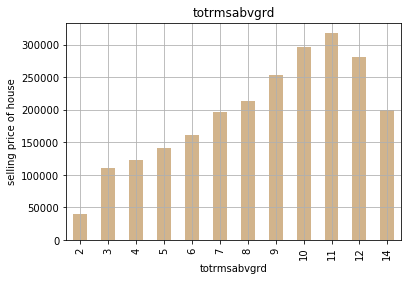

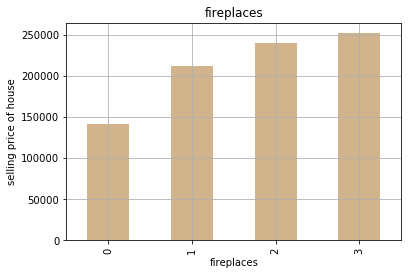

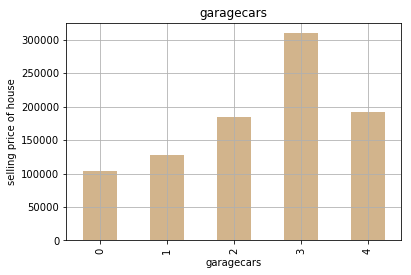

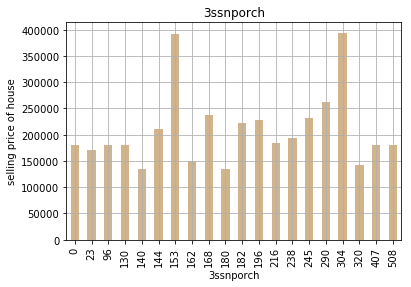

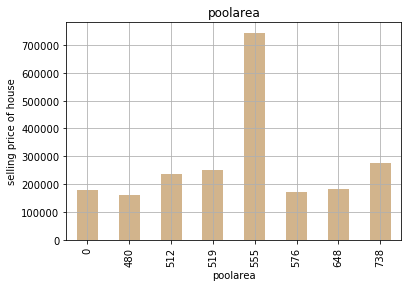

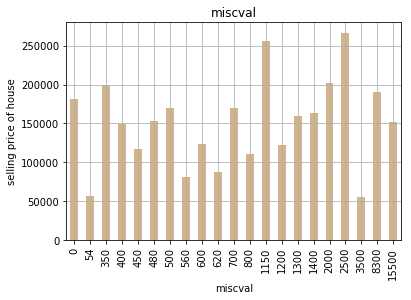

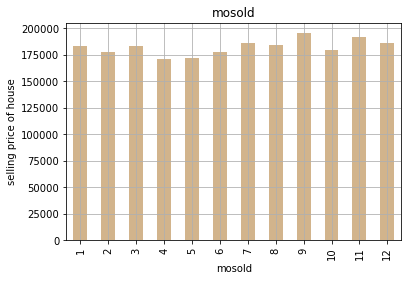

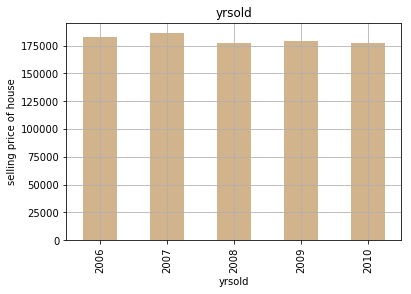

In [298]:
plot()

### how the temporal variables relate to selling price

In [41]:
temporal_vars

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

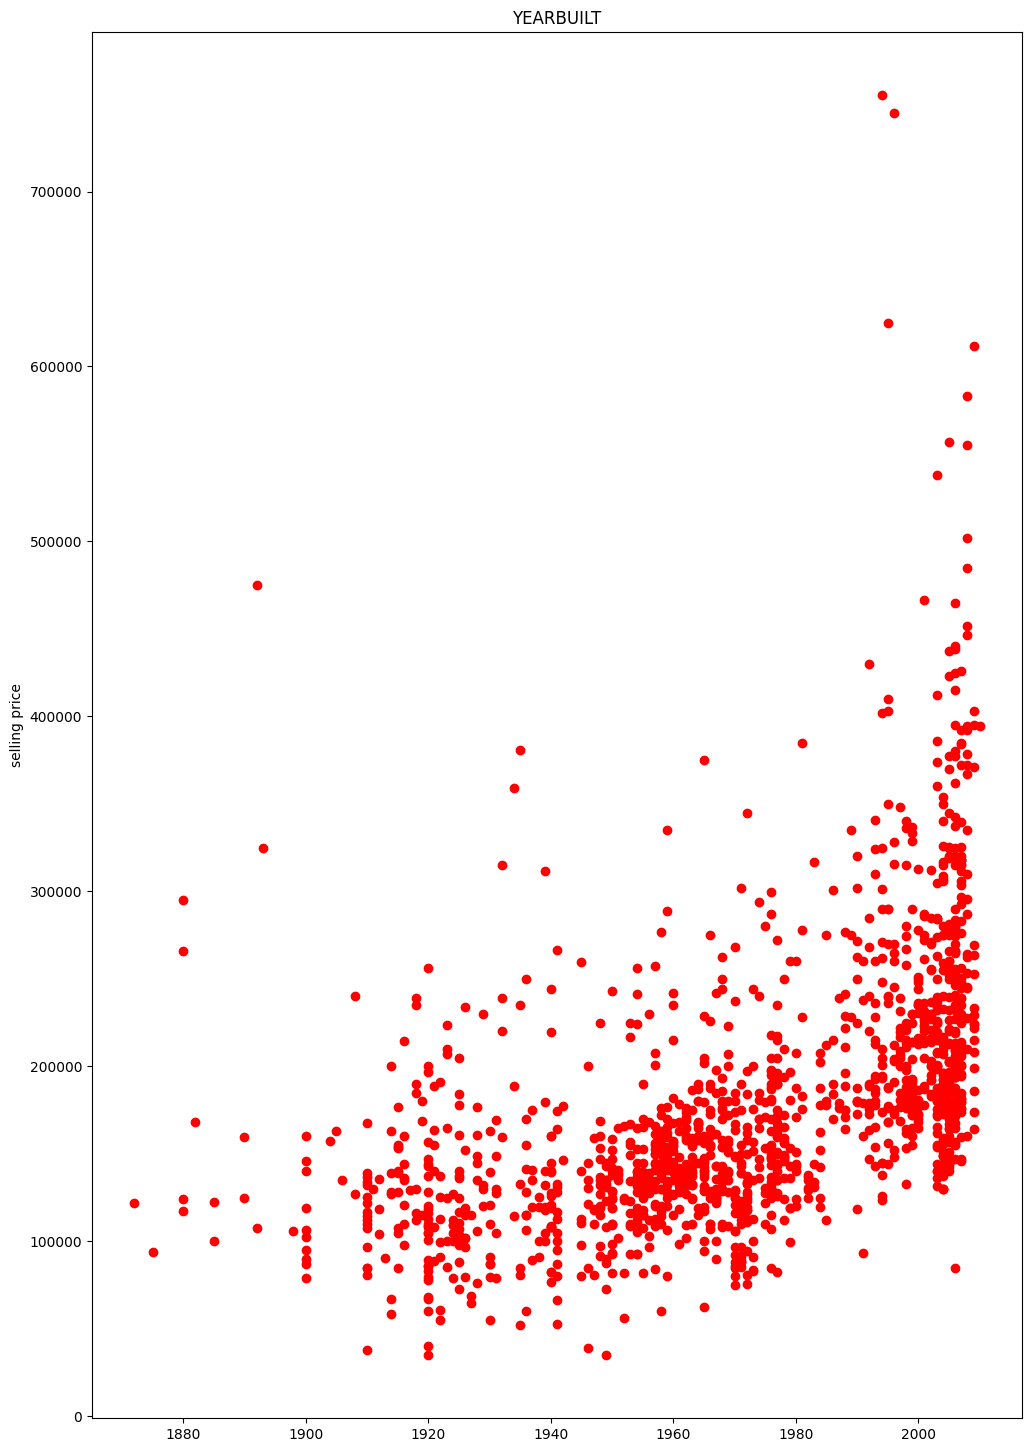

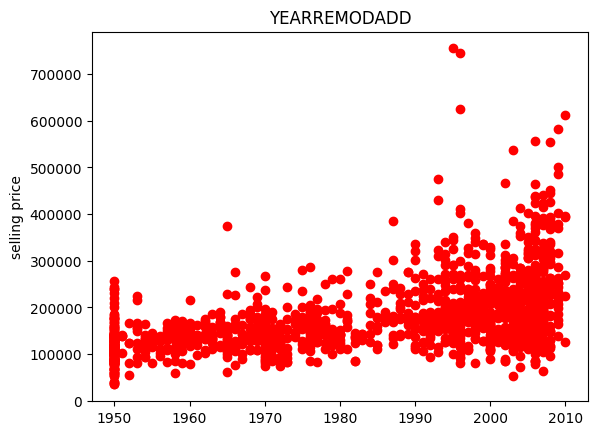

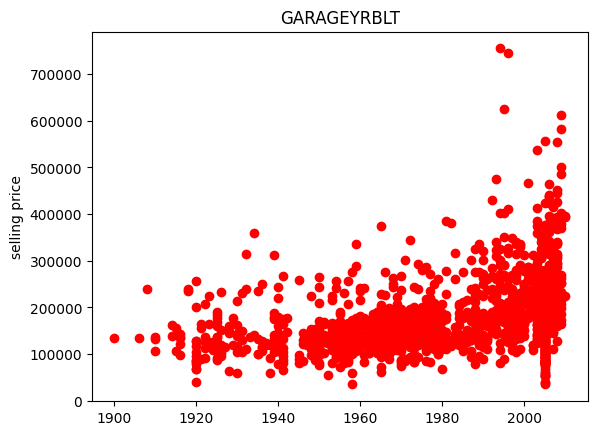

In [42]:
fig = plt.figure(figsize=(12,18))
def plt_temporal():
    for var in temporal_vars:
        if not var=='yrsold':
            plt.scatter(x=train[var],y=train['saleprice'],c='red')
            plt.ylabel('selling price')
            plt.title(var.upper())
            plt.show()
plt_temporal()

## Outliers 

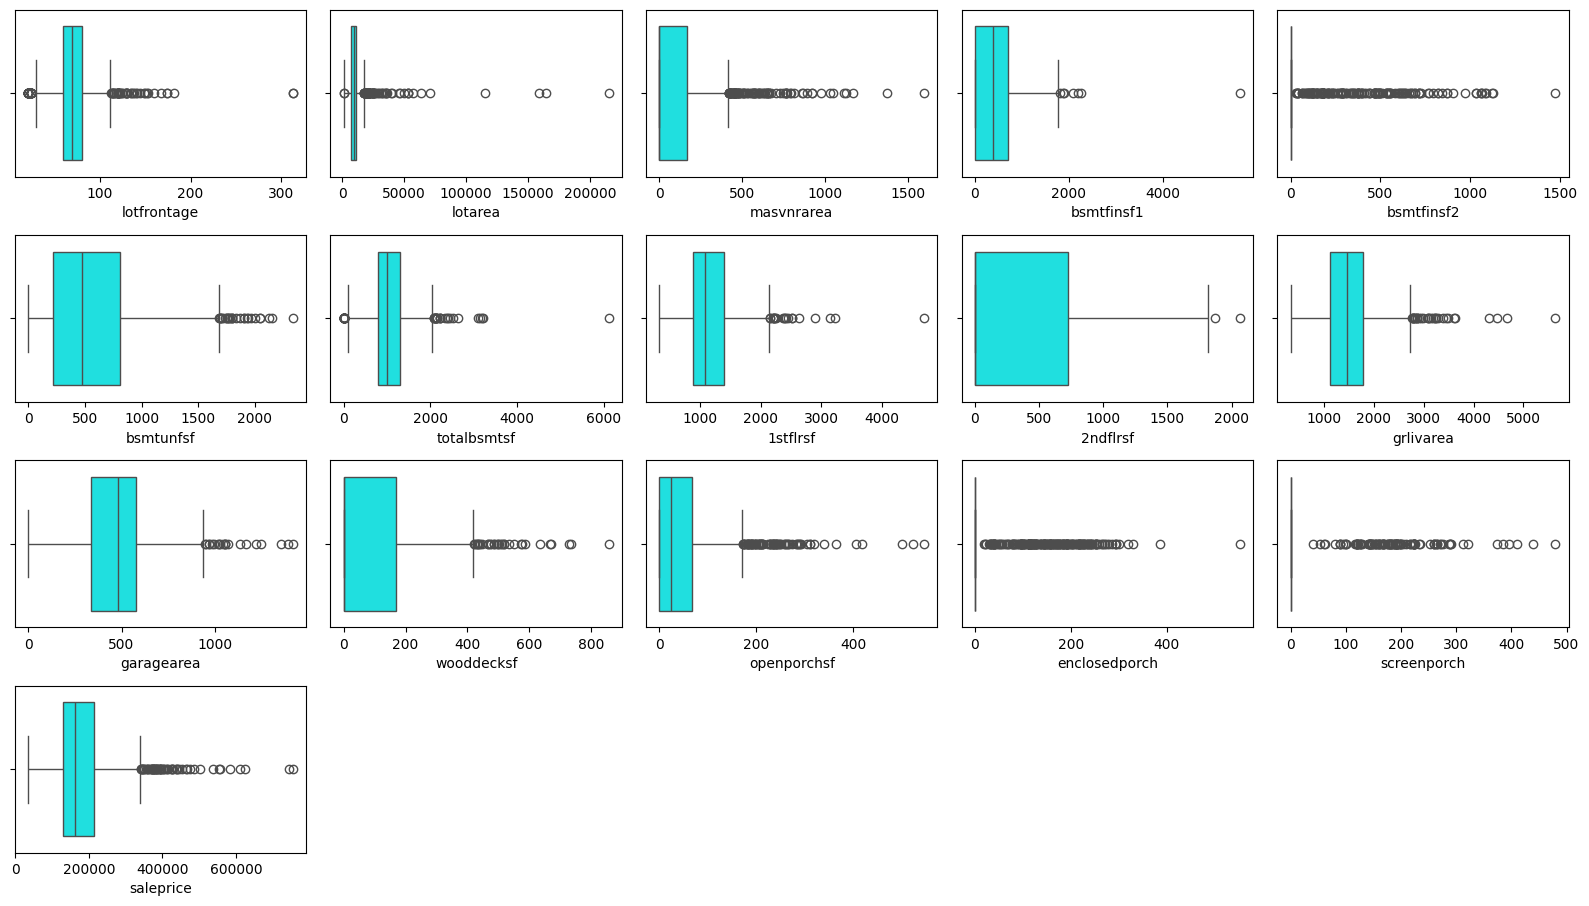

In [43]:
# identify then plot 
# univariate 
# multivariate 
# remove them 
# do a box plots for the numerical vars
# fig = plt.figure(figsize=(16,20))
# for i in range(len(numerical.columns)):
#     fig.add_subplot(9, 4, i+1)
#     for var in numerical:
#         sns.boxplot(numerical[var])
# plt.show()
continous_df=numerical[continous_numerical]# get the contious variables data frame 

fig=plt.figure(figsize=(16,20))
for var in range(len(continous_df.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=continous_df.iloc[:,var],color="cyan")
plt.tight_layout()
plt.show()

###### Using the 1.5 IQR Rule: 
![](https://cdn.kastatic.org/googleusercontent/8bSRVB7q_zWxFliXcZVQSBDtip3sMGRkkHGLVzvflS3goQZZhmhrSD9u1cSduXh-9DJ9sSjCqVyozwQ_FwJNkptC)

##### It states that a data point is an outlier if:
- It is below the First Quadrant (Q1) subtracted by (1.5 x IQR)
- It is above the Third Quadrant (Q3) added by (1.5 x IQR)

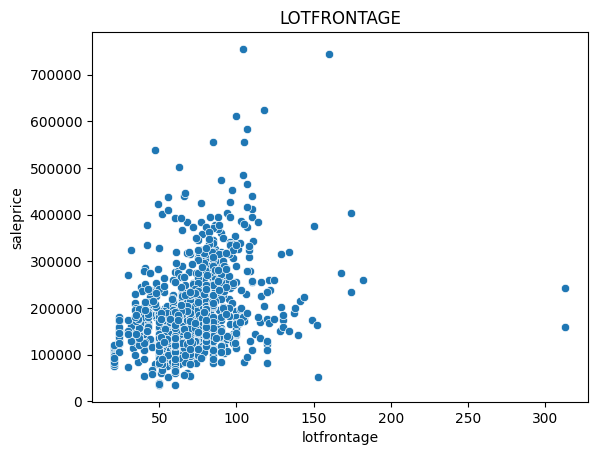

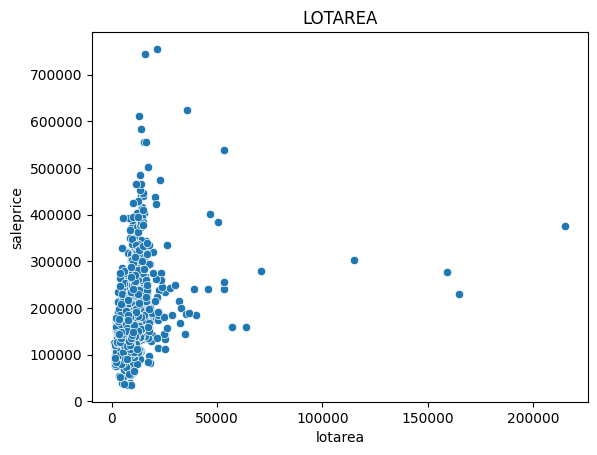

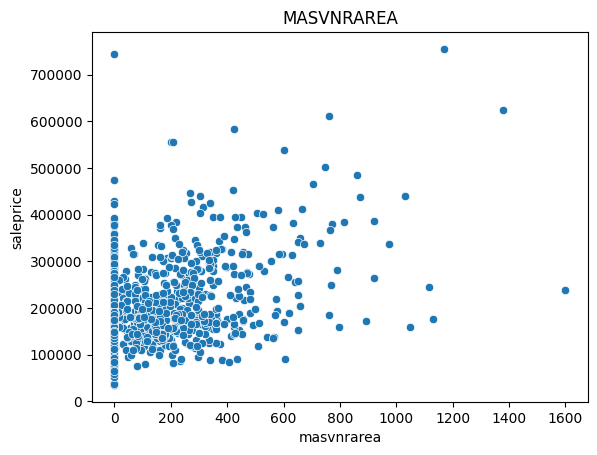

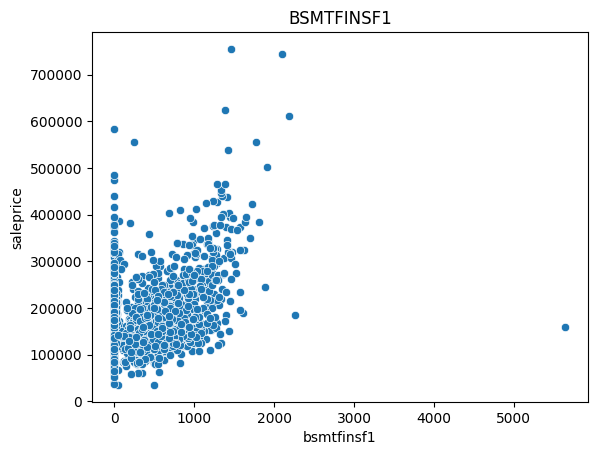

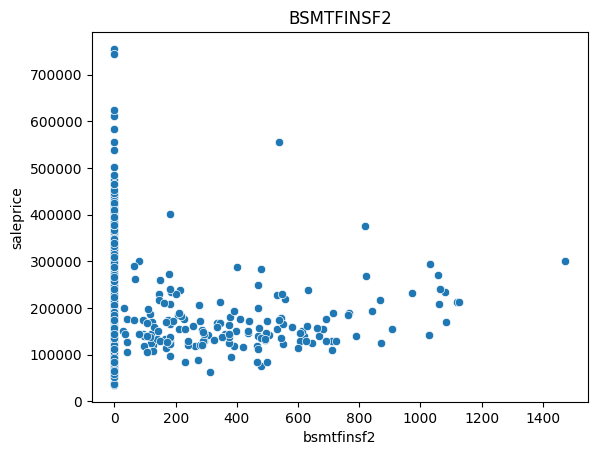

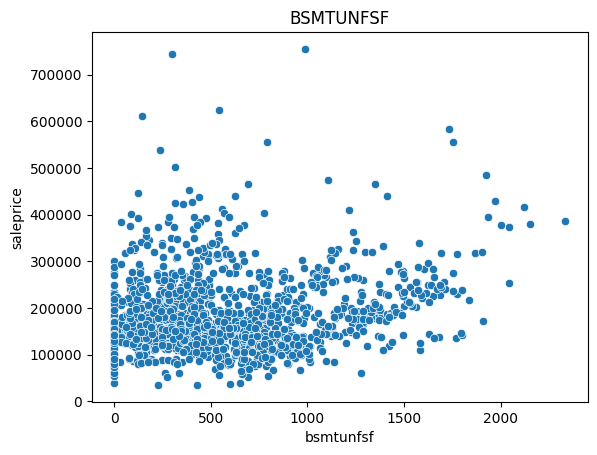

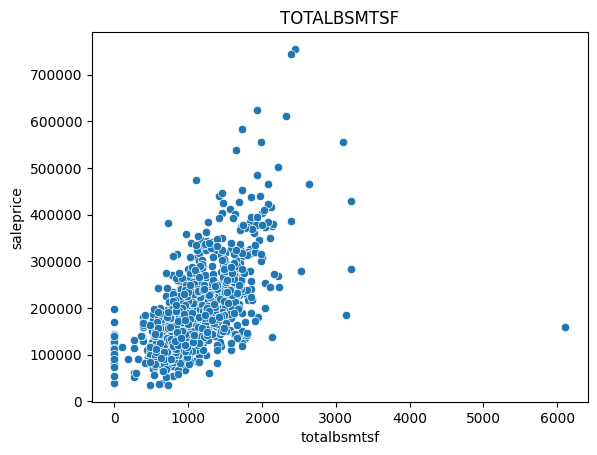

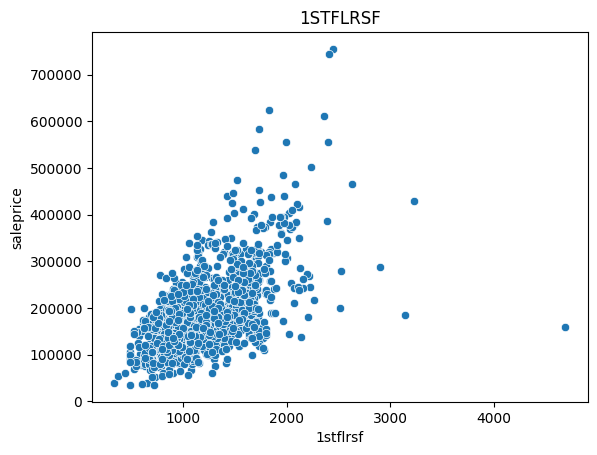

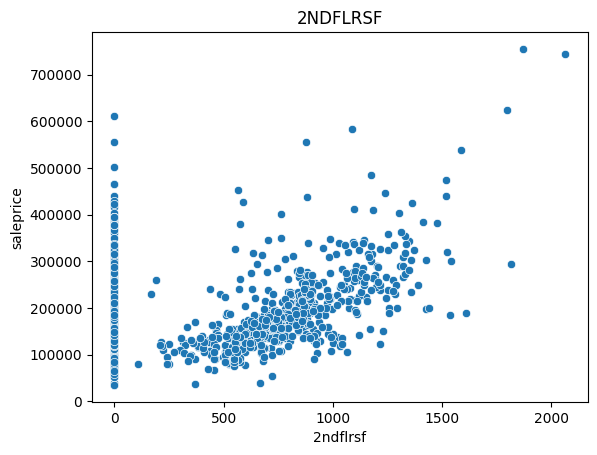

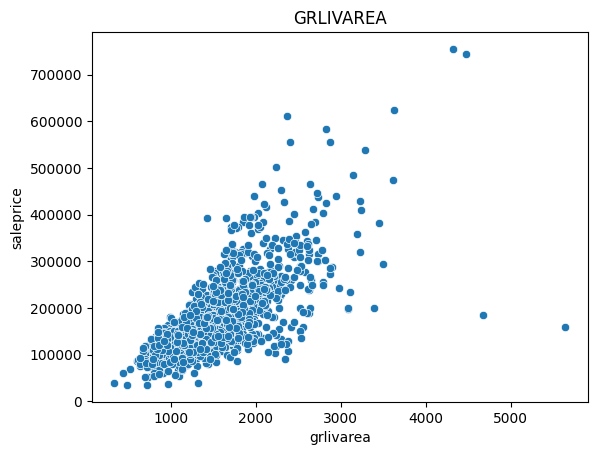

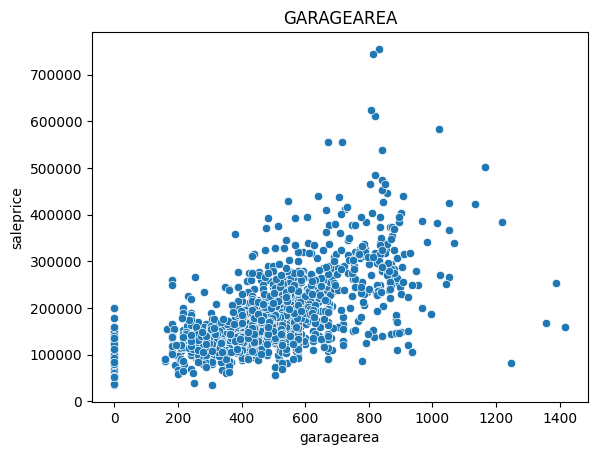

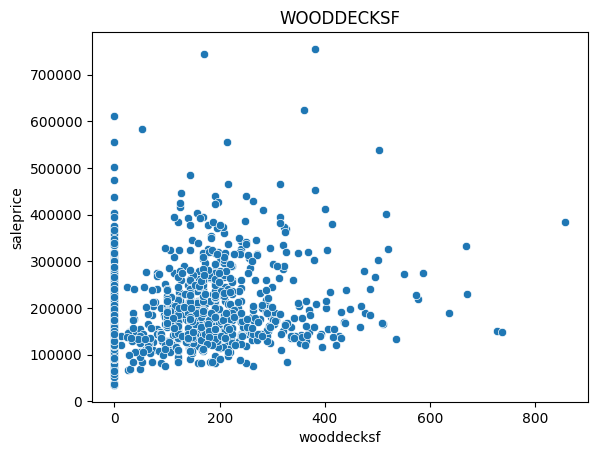

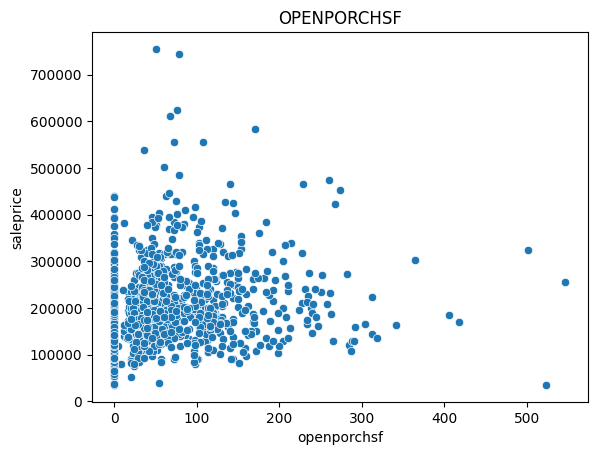

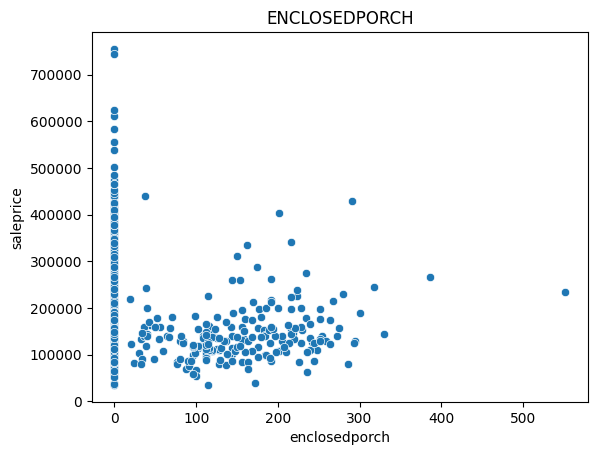

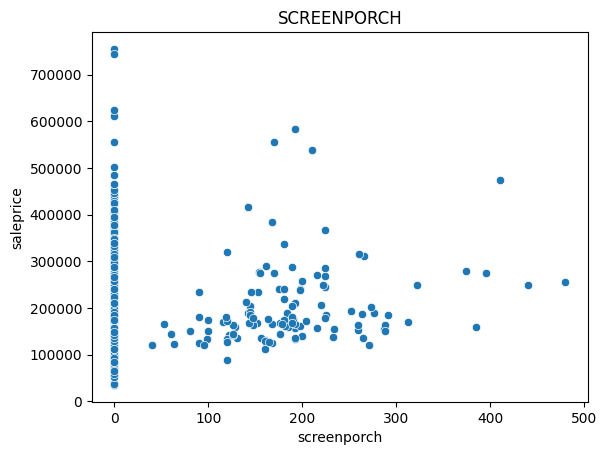

In [44]:
## bivaraite outlier analysis 
for var in continous_df:
    if not var=='id'and var!='saleprice':
        sns.scatterplot(x=continous_df[var],y=continous_df['saleprice'])
        plt.title(var.upper())
        plt.show()

In [ ]:
# Changing and handling data types 